## Make square, white background, control size functions

In [144]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
 
def resizeAndPad(img, size, padColor=0):

    h, w = img.shape[:2]
    sh, sw = size

    # interpolation method
    if h > sh or w > sw: # shrinking image
        interp = cv2.INTER_AREA
    else: # stretching image
        interp = cv2.INTER_CUBIC

    # aspect ratio of image
    #print(img.shape[:2])
    #print(h,w)
    aspect = w/h  # if on Python 2, you might need to cast as a float: float(w)/h
    #print(aspect)
    # compute scaling and pad sizing
    if aspect > 1: # horizontal image
        new_w = sw
        new_h = np.round(new_w/aspect).astype(int)
        pad_vert = (sh-new_h)/2
        pad_top, pad_bot = np.floor(pad_vert).astype(int), np.ceil(pad_vert).astype(int)
        pad_left, pad_right = 0, 0
    elif aspect < 1: # vertical image
        new_h = sh
        new_w = np.round(new_h*aspect).astype(int)
        pad_horz = (sw-new_w)/2
        pad_left, pad_right = np.floor(pad_horz).astype(int), np.ceil(pad_horz).astype(int)
        pad_top, pad_bot = 0, 0
    else: # square image
        new_h, new_w = sh, sw
        pad_left, pad_right, pad_top, pad_bot = 0, 0, 0, 0

    # set pad color
    if len(img.shape) == 3 and not isinstance(padColor, (list, tuple, np.ndarray)): # color image but only one color provided
        padColor = [padColor]*3
        #padColor = cv2.BORDER_REPLICATE

    # scale and pad
    scaled_img = cv2.resize(img, (new_w, new_h), interpolation=interp)
    scaled_img = cv2.copyMakeBorder(scaled_img, pad_top, pad_bot, pad_left, pad_right, borderType=cv2.BORDER_CONSTANT, value=[255, 255, 255])
#borderType=cv2.BORDER_REPLICATE 
    return scaled_img



def SelectAndCutBlackObject(img):
    
    indices = np.where(img < [20])
    minimum_y = np.amin(indices[0]) 
    maximum_y = np.amax(indices[0]) 
    minimum_x = np.amin(indices[1]) 
    maximum_x = np.amax(indices[1]) 
    deer = img[minimum_y:maximum_y, minimum_x:maximum_x]
    return deer

def ReduceGrey(img):
    img[np.where(((image>[70, 70, 70]) & (image <[245, 245, 245])).all(axis=2))] = [255,255,255]
    return img
    

# Цикл

In [ ]:
import os

path = "/mnt/c/Users/Maria/Documents/DH/petroglyphs/images/cut_deers/"

for f in os.listdir(path):
    filename, fext = os.path.splitext(f)
    print(path+filename+fext)
    image = cv2.imread(path+filename+fext)
    new_image = ReduceGrey(image)
    new_image = SelectAndCutBlackObject(new_image)
    new_image = resizeAndPad(new_image,(30,30)) # в скобках задаём размер
    #plt.imshow(new_image)
    cv2.imwrite('/mnt/c/Users/Maria/Documents/DH/petroglyphs/images/gan_images/{}.png'.format(filename), new_image)
        

'/mnt/c/users/maria/documents/dh/petroglyphs/petroglyphs'

# для проверок

(368, 466)
16546860
uint8


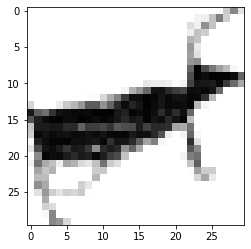

In [161]:
#image = cv2.imread("/mnt/c/Users/Maria/Documents/DH/petroglyphs/images/4/cut_photoshop/4-12-3.png")
image = cv2.imread('/mnt/c/Users/Maria/Documents/DH/petroglyphs/images/cut_deers/4-2-5.png')

new_image = ReduceGrey(image)
new_image = SelectAndCutBlackObject(new_image)
# indices = np.where(new_image < [20])
# print(indices)
# minimum_y = np.amin(indices[0]) 
# maximum_y = np.amax(indices[0]) 
# minimum_x = np.amin(indices[1]) 
# maximum_x = np.amax(indices[1]) 
# deer = image[minimum_y:maximum_y, minimum_x:maximum_x]
resized_image = resizeAndPad(new_image,(30,30)) # в скобках задаём размер
plt.imshow(resized_image)

cv2.imwrite('/mnt/c/Users/Maria/Documents/DH/petroglyphs/images/gan_images/4-2-5.png', resized_image)

#print(new_image.shape)
print( deer.shape[:2] )
#print(resized_image.shape[:2])
#h,w = new_image.shape[:2]
#aspect = w/h
#print(aspect)
#plt.imshow(deer)

print( image.size ) # number of pixels
print( image.dtype )

#plt.imshow(new_image)

https://answers.opencv.org/question/98980/how-to-retrieve-all-coordinates-of-pixels-of-specific-colour-in-an-image/ 

[ 0 14  2]
(1200, 1920, 3)
6912000
uint8


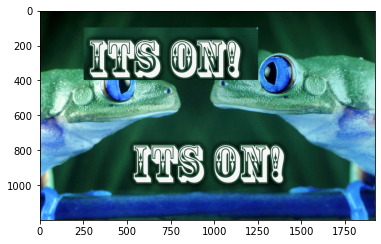

In [6]:
import numpy as np
import cv2 
from matplotlib import pyplot as plt

img = cv.imread('/mnt/c/Users/Maria/Pictures/Saved Pictures/74008.jpg')

px = img[100,90]
print( px )
print( img.shape )
plt.imshow(img)
print( img.size ) # number of pixels
print( img.dtype )

text = img[700:1000, 500:1500]
img[100:400, 250:1250] = text
plt.imshow(img)

## Оставить только черное
https://stackoverflow.com/questions/23680498/detect-gray-things-with-opencv
https://pyimagesearch.com/2014/08/04/opencv-python-color-detection/
https://stackoverflow.com/questions/50850692/opencv-replace-all-black-colored-pixels-in-video-with-white
https://stackoverflow.com/questions/54978271/opencv-plot-black-pixels-on-a-image
https://techvidvan.com/tutorials/detect-objects-of-similar-color-using-opencv-in-python/
https://answers.opencv.org/question/219194/black-and-white-image-detection/

## change backgroung colour
source: https://github.com/fiyero/Opencv_replace_bg/blob/master/OpenCV_replace_bg_git.ipynb

This image is: <class 'numpy.ndarray'>  with dimensions: (911, 733, 3)


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: cHRM chunk does not match sRGB


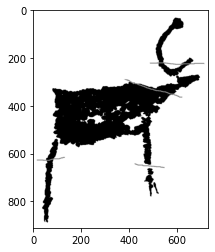

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

image = cv2.imread("/mnt/c/Users/Maria/Documents/DH/petroglyphs/petroglyph/4/cut_photoshop/01-3-1.png")
print('This image is:', type(image), 
      ' with dimensions:', image.shape)

image_copy = np.copy(image)
plt.imshow(image_copy)

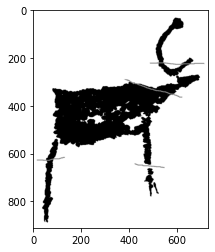

In [13]:
# https://note.nkmk.me/en/python-opencv-bgr-rgb-cvtcolor/ 
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
plt.imshow(image_copy)

Define the color threshold

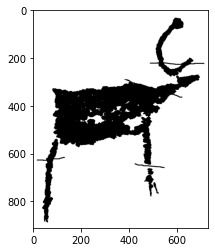

In [14]:
lower_white = np.array([240,240,240])  
upper_white = np.array([255,255,255])
# create a mask
mask = cv2.inRange(image_copy, lower_white, upper_white)
plt.imshow(mask, cmap='gray')

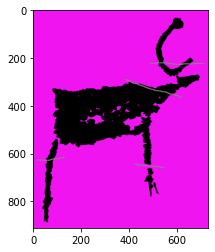

In [15]:
masked_image = np.copy(image_copy)
masked_image[mask != 0] = [240, 20, 240]
plt.imshow(masked_image)

inRange(img, l_s, r_s). 
Первый параметр — изменяемое изображение, а второй и третий — левая и правая граница пропускаемого цвета.
https://robx.org/wiki/prog/opencv-biblioteka/filtraciya-v-opencv/


# Загрузить 25 изображений

In [ ]:
# load and plot deers
from os import listdir
from numpy import asarray
from PIL import Image
from matplotlib import pyplot

def load_image(filename):
# load image from file
    image = Image.open(filename)
# convert to RGB, if needed
    image = image.convert('RGB')
# convert to array
    pixels = asarray(image)
    return pixels

# load images and extract faces for all images in a directory
def load_faces(directory, n_faces):
    faces = list()
    # enumerate files
    for filename in listdir(directory):
        # load the image
        pixels = load_image(directory + filename)
        # store
        faces.append(pixels)
        # stop once we have enough
        if len(faces) >= n_faces:
            break
    return asarray(faces)

#plotting images arranged into in a square.
def plot_faces(faces, n):
    for i in range(n * n):
# define subplot
        pyplot.subplot(n, n, 1 + i)
# turn off axis
        pyplot.axis('off')
# plot raw pixel data
        pyplot.imshow(faces[i])
    pyplot.show()

# directory that contains all images
directory = '/mnt/c/Users/Maria/Documents/DH/petroglyphs/images/4/cut_photoshop/'
# load and extract all faces
faces = load_faces(directory, 25)
print('Loaded: ', faces.shape)
# plot faces
plot_faces(faces, 5)

## Перевернуть по таблице признаков

In [13]:
import pandas as pd
deers = pd.read_csv('/mnt/c/Users/Maria/Documents/DH/petroglyphs/deer_table.csv', encoding = "utf-8")

deers.head()

,№ поверности,буква,№ оленя,№png,"orientation (vertical - 1, gorizontal - 0)","direction (left - 1, right - 0)",take for GAN,whole,upside down
0,1-1,NaN,1,1-1-1,0,1.0,1,1,NaN
1,1-1,NaN,2,1-1-2,0,1.0,0,NaN,NaN
2,1-2,NaN,1,1-2-1,0,0.0,1,1,NaN
3,1-3,NaN,1,1-3-1,0,0.0,1,1,NaN
4,1-3,NaN,2,1-3-2,0,0.0,1,1,NaN


In [40]:
new_deers = pd.DataFrame({})
new_deers['png'] = deers['№png']
new_deers['take'] = deers['take for GAN']
new_deers['orient'] = deers['orientation (vertical - 1, gorizontal - 0)']
new_deers['direct'] = deers['direction (left - 1, right - 0)']

In [58]:
#new_deers.head()
new_deers.loc[0, 'take']

1

In [216]:
import cv2
originalImage = cv2.imread("/mnt/c/Users/Maria/Documents/DH/petroglyphs/images/cut_deers/10-4-a-1.png")


flipVertical = cv2.flip(originalImage, 0)
flipHorizontal = cv2.flip(originalImage, 1)
flipBoth = cv2.flip(originalImage, -1)
# rotate = cv2.rotate(originalImage)

libpng warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG


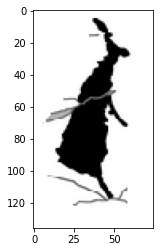

In [219]:
import matplotlib.pyplot as plt

#plt.imshow(originalImage)
#plt.imshow(flipVertical)
cv2.imwrite('/mnt/c/Users/Maria/Documents/DH/petroglyphs/images/for_gan/10-4-a-1.png', flipHorizontal)
plt.imshow(flipHorizontal)
#plt.imshow(flipBoth)

In [108]:
vert_dict = vertical.to_dict(orient='records')
#type(vert_dict)
vert_dict

[{'png': '2-27-6', 'take': 1, 'orient': 1, 'direct': 0.0},
 {'png': '2-27-7', 'take': 1, 'orient': 1, 'direct': 1.0},
 {'png': '2-38-2', 'take': 1, 'orient': 1, 'direct': 1.0},
 {'png': '3-1-5', 'take': 1, 'orient': 1, 'direct': 0.0},
 {'png': '4-19-4', 'take': 1, 'orient': 1, 'direct': 1.0},
 {'png': '4-31-5', 'take': 1, 'orient': 1, 'direct': 1.0},
 {'png': '6-9-6', 'take': 1, 'orient': 1, 'direct': 0.0},
 {'png': '10-4-а-1', 'take': 1, 'orient': 1, 'direct': 1.0},
 {'png': '10-6-3', 'take': 1, 'orient': 1, 'direct': 1.0},
 {'png': '10-10-2', 'take': 1, 'orient': 1, 'direct': 1.0},
 {'png': '10-10-3', 'take': 1, 'orient': 1, 'direct': 1.0}]

In [163]:
no = new_deers[new_deers["take"]==0]

left = new_deers[new_deers["direct"]==1]

vertical = new_deers[new_deers['orient'] == 1]


vertical_dic= vertical.to_dict(orient='records')
#print(left_dic)
vertical_values = []
for i in vertical_dic:
    for key, value in i.items():
        if key == 'png':
        #values.append(value)
            vertical_values.append(value)
        

In [183]:
no_values
#left_values
#vertical_values

# import numpy as np
# import matplotlib.pyplot as plt


# fig = plt.figure(figsize=(10, 10))
# columns = 5
# rows = 11
# for i in range(1, columns*rows +1):
#     img = np.random.randint(10, size=(h,w))
#     fig.add_subplot(rows, columns, i)
#     plt.imshow(img)
# plt.show()
# for f in os.listdir(path):
#     filename, fext = os.path.splitext(f)
#     #print(path+filename+fext)
    
#     if filename in no_values:

#         originalImage = cv2.imread(path+filename+fext) 
        

['1-1-2',
 '1-6-1',
 '2-7-1',
 '2-11-1-3',
 '2-13-8',
 '2-17-1',
 '2-24-5',
 '2-30-1',
 '2-33-2',
 '2-44-2',
 '2-54-3',
 '3-8-1',
 '4-1-6',
 '4-1-11',
 '4-3-1',
 '4-19-5',
 '4-23-8',
 '4-30-2',
 '4-30-3',
 '4-54-1',
 '5-3-5',
 '5-6-1',
 '5-8-b-4',
 '5-8-b-5',
 '5-8-b-6',
 '5-17-2',
 '5-40-1',
 '6-1-5',
 '6-6-d-1',
 '6-7-5',
 '6-8-3',
 '6-9-2',
 '6-9-3',
 '6-9-5',
 '6-9-9',
 '6-11-c-2',
 '6-11-c-4',
 '6-21-1',
 '6-26-1',
 '6-27-3',
 '7-1-1',
 '8-1-2',
 '8-3-1',
 '8-8-a-1',
 '9-11-1',
 '9-13-3',
 '9-13-5',
 '10-2-1',
 '10-3-1',
 '10-6-5',
 '10-8-1',
 '10-16-3',
 '11-1-d-1',
 '11-4-1',
 '11-5-1']

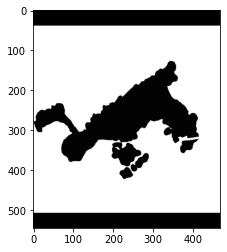

In [141]:
def rotate(image):
    # grab the dimensions of the image and calculate the center of the
    # image
    (h, w) = image.shape[:2]
    (cX, cY) = (w // 2, h // 2)
    # rotate our image by 45 degrees around the center of the image
    M = cv2.getRotationMatrix2D((cX, cY), 90, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h))
    return(rotated)
import matplotlib.pyplot as plt
import cv2
originalImage = cv2.imread("/mnt/c/Users/Maria/Documents/DH/petroglyphs/images/cut_deers/2-27-7.png")
#plt.imshow(originalImage)
new= rotate(originalImage)
plt.imshow(new)

In [181]:
## rotation

import os
import cv2
path = "/mnt/c/Users/Maria/Documents/DH/petroglyphs/images/cut_deers/"

for f in os.listdir(path):
    filename, fext = os.path.splitext(f)
    #print(path+filename+fext)
    
    if filename not in no_values:
        if filename in left_values:
            originalImage = cv2.imread(path+filename+fext)
            nflipHorizontal = cv2.flip(originalImage, 1)
            cv2.imwrite('/mnt/c/Users/Maria/Documents/DH/petroglyphs/images/for_gan/{}.png'.format(filename), nflipHorizontal)
        elif filename in vertical_values:
            originalImage = cv2.imread(path+filename+fext)
            new= rotate(originalImage)
            cv2.imwrite('/mnt/c/Users/Maria/Documents/DH/petroglyphs/images/for_gan/{}.png'.format(filename), new)
        elif (filename in left_values) & (filename in vertical_values):
            originalImage = cv2.imread(path+filename+fext)
            new= rotate(originalImage)
            nflipHorizontal = cv2.flip(new, 1)
            cv2.imwrite('/mnt/c/Users/Maria/Documents/DH/petroglyphs/images/for_gan/{}.png'.format(filename), nflipHorizontal)
        else:
            originalImage = cv2.imread(path+filename+fext)
            cv2.imwrite('/mnt/c/Users/Maria/Documents/DH/petroglyphs/images/for_gan/{}.png'.format(filename), originalImage)

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: cHRM chunk does not match sRGB
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: cHRM chunk does not match sRGB
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: cHRM chunk does not match sRGB
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: cHRM chunk does not match sRGB
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: cHRM chunk does not match sRGB
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: cHRM chunk does not match sRGB
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: cHRM chunk does not match sRGB
libpng warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG
libpng warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: cHRM chun